#Jamboree Education

##Problem Statement

Analyze the dataset to identify the key factors influencing graduate admissions and how they are interrelated to each other.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
!gdown 1zzv4C-G6ovVzGOrEEq_SNK1PMwAiAb-Q

Downloading...
From: https://drive.google.com/uc?id=1zzv4C-G6ovVzGOrEEq_SNK1PMwAiAb-Q
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 25.5MB/s]


In [ ]:
df = pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.shape

(500, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Column Profiling:

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

In [ ]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* From the above we can see that GRE Score , TOEFL Score and CGPA has similar mean and median
* Other columns University Rating , SOP  LOR also have a similar mean and median  

In [ ]:
df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

We can convert university rating , SOP and LOR to categorial columns since they are not continous

In [ ]:
df[['University Rating', 'SOP', 'LOR']] = df[['University Rating', 'SOP', 'LOR']].astype('category')

Since Research column is like a yes or no column , converting it to boolean

In [ ]:
df[['Research']] = df[['Research']].astype('bool')

###EDA

####Distribution of GRE Scores

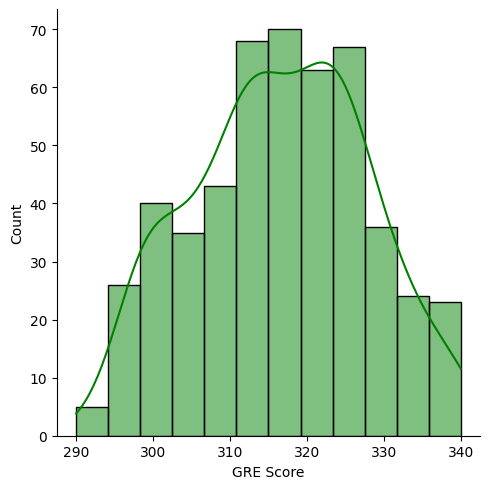

In [ ]:
sns.displot(df['GRE Score'],color='green',kde=True)

* GRE Scores are in the range of (290,340) with highest no of students scored between (310,320)

####Distribution of TOEFL Scores

<Axes: xlabel='TOEFL Score', ylabel='Count'>

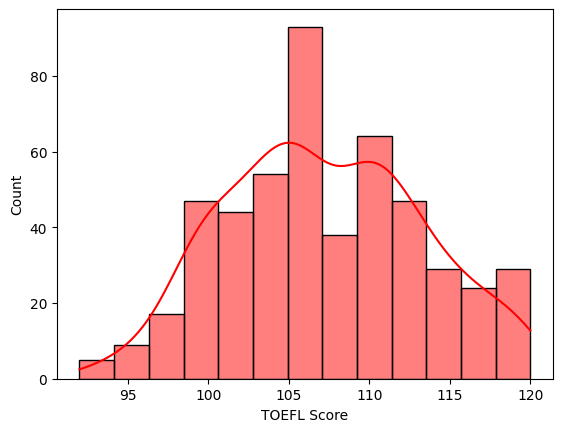

In [ ]:
sns.histplot(df['TOEFL Score'],color='red',kde=True)

TOEFL Scores are in the range of 90 to 120 with highest number of students scoring 105

####University rating  v/s Chances of Admit

<Axes: xlabel='University Rating', ylabel='Chance of Admit'>

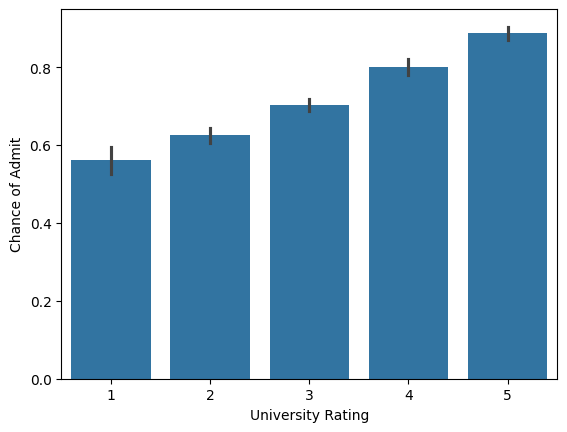

In [ ]:
sns.barplot(x=df['University Rating'],y=df['Chance of Admit'])

* From the above plot we can infer that higher the university rating higher the chance of admit

#### SOP&LOR v/s Chance of Admit

In [ ]:
df_1 = df[['SOP','LOR','Chance of Admit']]
df_1.head()


,SOP,LOR,Chance of Admit
0,4.5,4.5,0.92
1,4.0,4.5,0.76
2,3.0,3.5,0.72
3,3.5,2.5,0.80
4,2.0,3.0,0.65


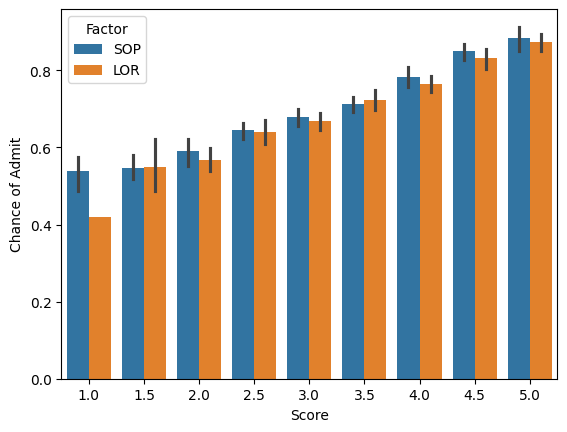

In [ ]:
df_melted = df_1.melt(id_vars='Chance of Admit', value_vars=['SOP', 'LOR'], var_name='Factor', value_name='Score')
sns.barplot(x='Score', y='Chance of Admit', hue='Factor', data=df_melted)
plt.show()


* LOR and SOP also have similar trend as that of university rating , where chance of admit increase as the LOP/ SOP value increases

####Distribution of CGPA

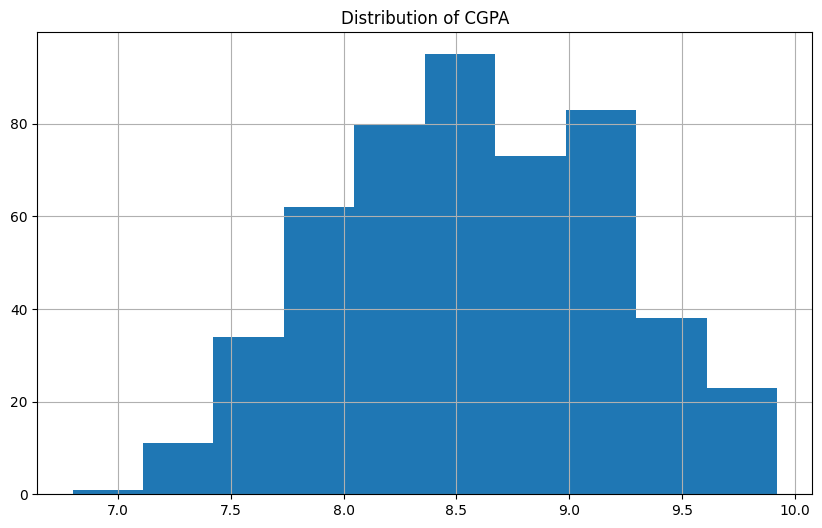

In [ ]:
df['CGPA'].hist(bins=10, figsize=(10, 6))
plt.title('Distribution of CGPA')
plt.show()

In [ ]:
df['CGPA'].mean()

8.576439999999998

* Maximum number of students have a CGPA of 8.5

####Distribution of Categorical Columns

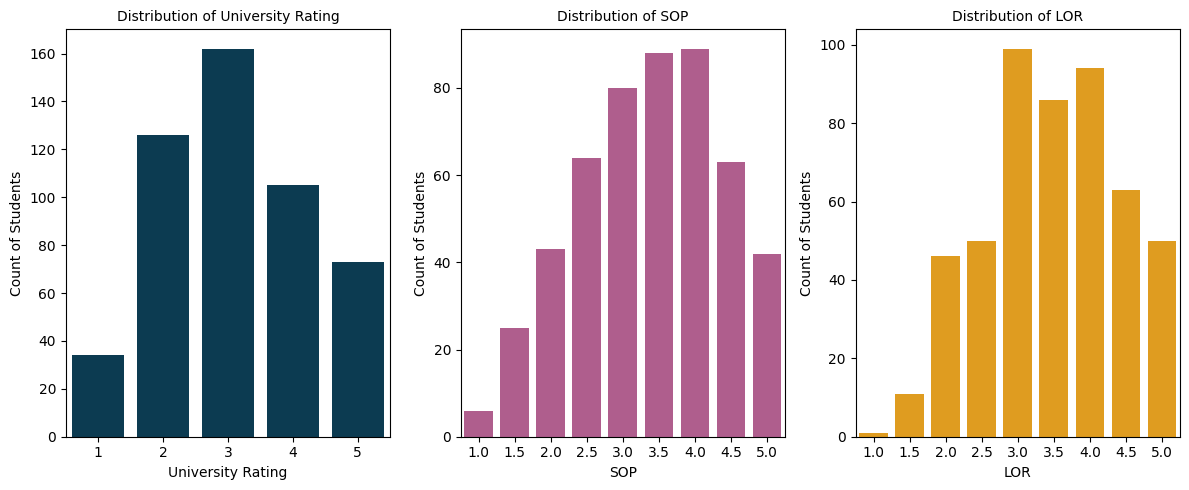

In [ ]:
plt.figure(figsize=(12,5))
i=1
colors = ['#003f5c','#bc5090','#ffa600']

for col in ('University Rating','SOP','LOR'):
  ax = plt.subplot(1,3,i)
  sns.countplot(x=df[col],color=colors[i-1])
  plt.title(f'Distribution of {col}', fontsize=10)
  plt.xlabel(col)
  plt.ylabel('Count of Students')
  i+=1

plt.tight_layout()
plt.show();

<Axes: xlabel='Research', ylabel='count'>

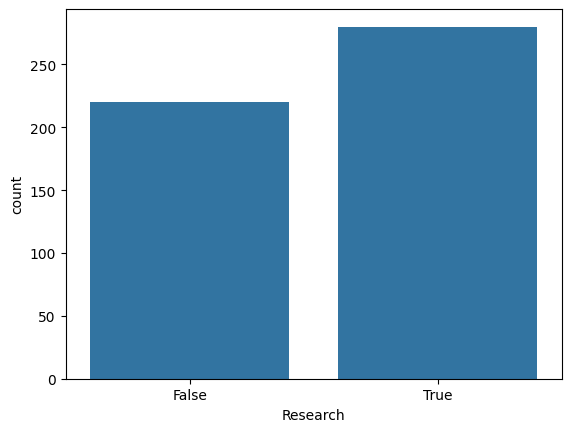

In [ ]:
sns.countplot(x=df['Research'])

It can be observed that the most frequent value of categorical features is as following:

* University Rating: 3
* SOP: 3.5 & 4
* LOR: 3
* Research: True

Dropping the serial number column as its just a unique row identifier and is of no imprtance in predicting

In [ ]:
df.drop('Serial No.',axis=1,inplace=True)

####Pairplot between columns

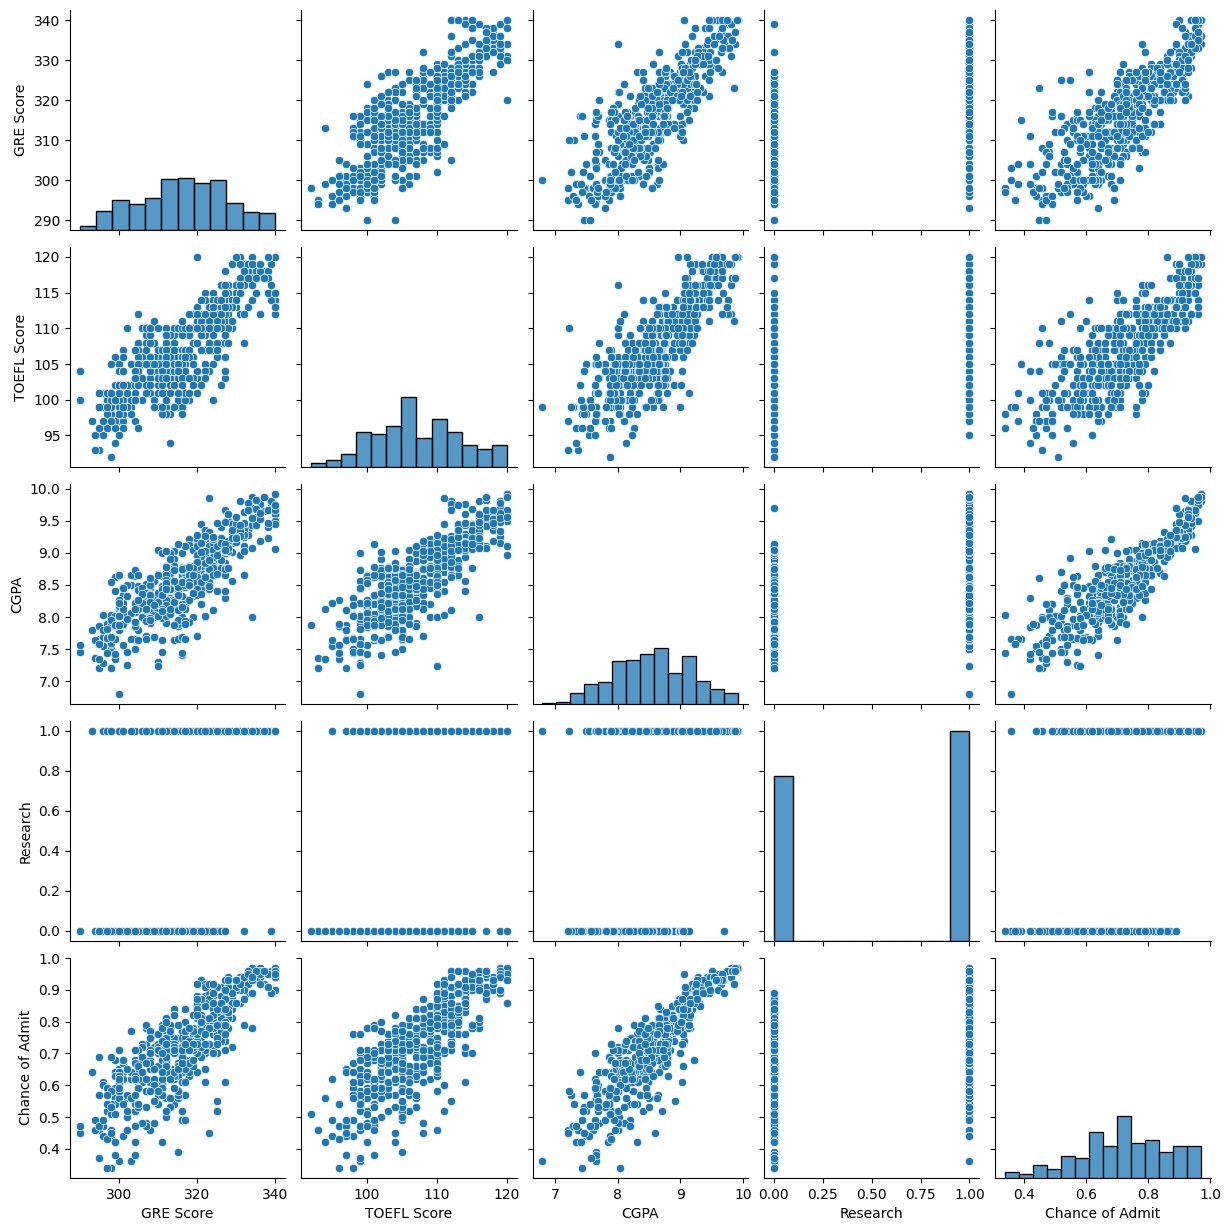

In [ ]:
sns.pairplot(df)
plt.show()

<Axes: >

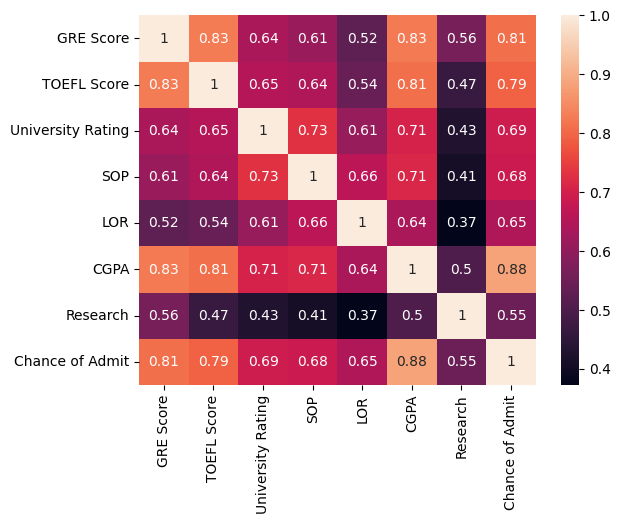

In [ ]:
sns.heatmap(df.corr(),annot=True)

*  From the pair plot we can see that the exams scores and chance of admit are highly correlated
*  Also the exam scores are correlated among themselves

#### Categorical Variables v/s Chance of Admit

<Axes: xlabel='Research', ylabel='Chance of Admit'>

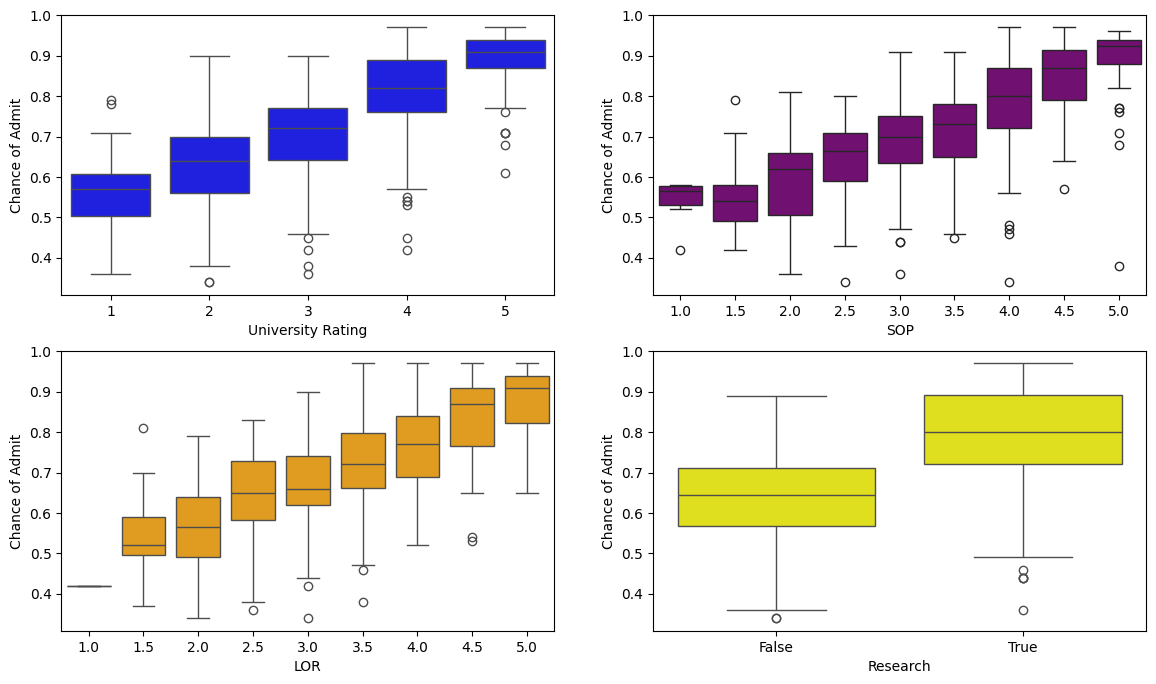

In [ ]:

fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))
sns.boxplot(x=df['University Rating'],y=df['Chance of Admit'],ax=axis[0, 0],color="Blue")
sns.boxplot(x=df['SOP'],y=df['Chance of Admit'],ax=axis[0, 1],color="Purple")
sns.boxplot(x=df['LOR'],y=df['Chance of Admit'],ax=axis[1, 0],color="Orange")
sns.boxplot(x=df['Research'],y=df['Chance of Admit'],ax=axis[1,1],color="Yellow")

*  The categorical variables such as Unversity rating, SOR and LOP  also increase the the chances of admit to top college when the student has a higher score in each of them
* The Students who have done research has more chances of being selected in a top college compared to a student who has not done research.

##Data Preprocessing

**Checking for null values**

In [ ]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

There are no missing values in the data set

**Checking for duplicate values**

In [ ]:
df.duplicated().sum()

0

**Outliers Check**

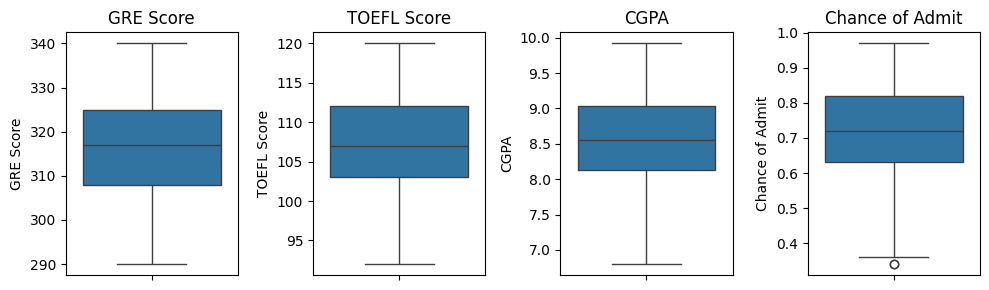

In [ ]:
plt.figure(figsize=(10,3))

n_colms = df.select_dtypes(include=['float','int']).columns.tolist()
i=1
for col in n_colms:
  ax=plt.subplot(1,4,i)
  sns.boxplot(df[col])
  plt.title(col)
  i+=1

plt.tight_layout()
plt.show()

From the above box plots we can observe that there are no outliers present in the numerical columns

##Train Test Split

In [ ]:
c_colms = df.select_dtypes(include=['bool','category']).columns.tolist()

In [ ]:
n_colms.remove('Chance of Admit')

In [ ]:
y = df['Chance of Admit']
x = df.drop('Chance of Admit',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

###Label Encoding and Standardizing

In [ ]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [ ]:
label_encoder ={}
for col in c_colms:
  label_encoder[col] = LabelEncoder()
  label_encoder[col].fit(x[col])

for col in c_colms:
  x_train[col] = label_encoder[col].transform(x_train[col])
  x_test[col] = label_encoder[col].transform(x_test[col])

In [ ]:
x=pd.concat([x_train,x_test])
cols = x_train.columns

In [ ]:
scaler = MinMaxScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=cols)
x_test = pd.DataFrame(scaler.transform(x_test),columns=cols)

In [ ]:
x_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.62,0.678571,0.50,0.625,0.714286,0.650641,1.0
1,0.52,0.678571,0.75,0.750,1.000000,0.557692,0.0
2,0.26,0.357143,0.50,0.625,0.428571,0.544872,0.0
3,0.48,0.535714,0.25,0.375,0.714286,0.471154,0.0
4,0.36,0.500000,0.50,0.625,0.285714,0.451923,1.0


##Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.12172192, 0.08388445, 0.01027519, 0.00725476, 0.06033294,
       0.3510845 , 0.02402679])

In [ ]:
x_train.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [ ]:
print("Weight of Coefficients")
m_coefficients = list(zip(x_train.columns, model.coef_))
m_coefficients = pd.DataFrame(m_coefficients, columns=['Feature', 'Weight'])

for feature,weight in zip(x_train.columns, model.coef_):
  print(f"{feature}: {np.round(weight,2)}")

Weight of Coefficients
GRE Score: 0.12
TOEFL Score: 0.08
University Rating: 0.01
SOP: 0.01
LOR: 0.06
CGPA: 0.35
Research: 0.02


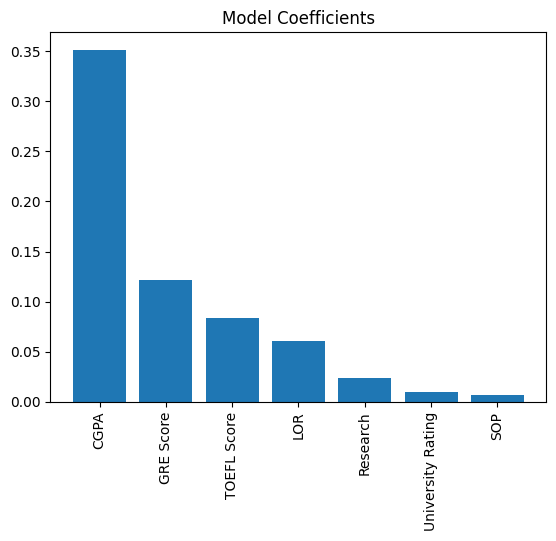

In [ ]:
m_coefficients.sort_values(by='Weight', ascending=False,inplace=True)
plt.bar(x=m_coefficients.Feature, height=m_coefficients.Weight)
plt.title('Model Coefficients')
plt.xticks(rotation=90)
plt.show()

In [ ]:
model.intercept_

0.35558405022527073

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

###Comparison of Actual vs Predicted Values for Each Feature

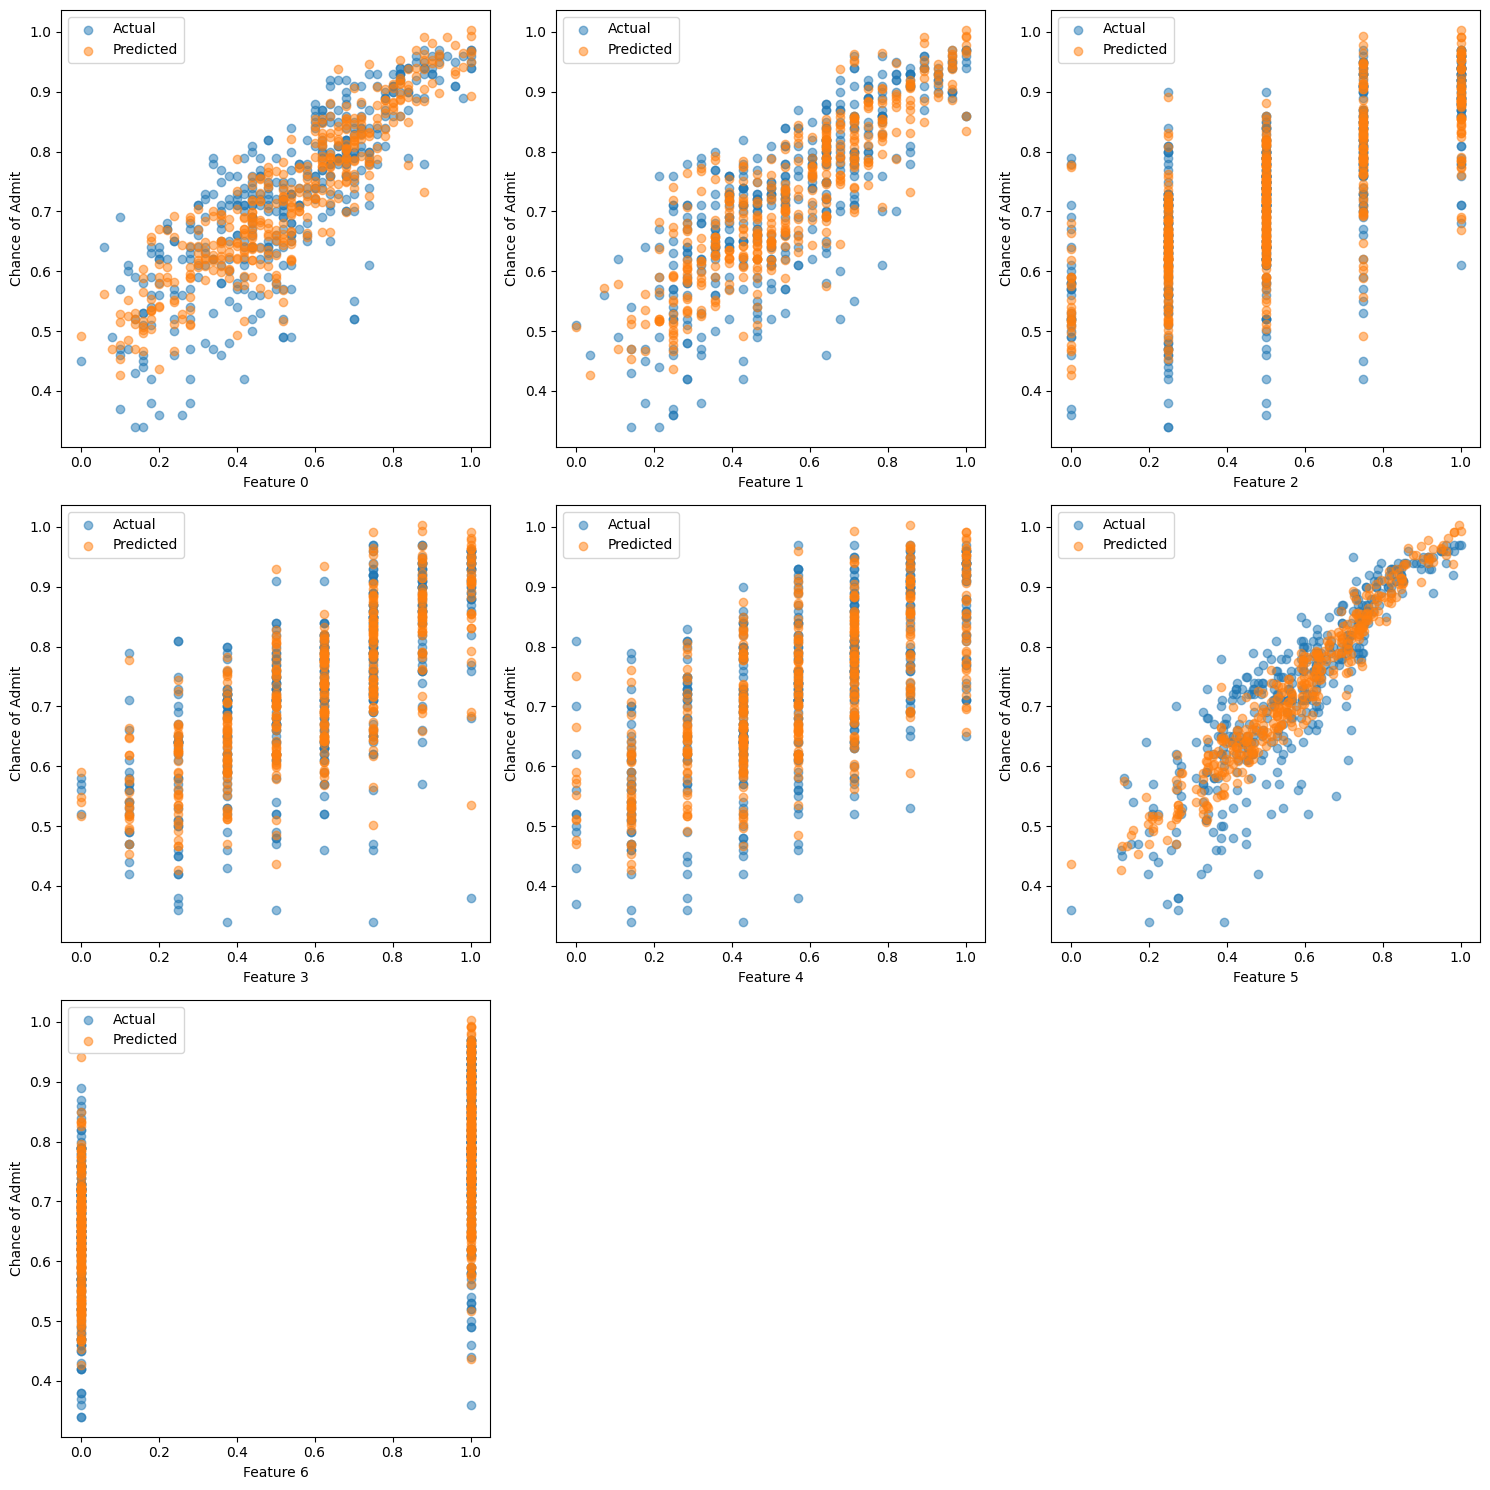

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Plotting each feature against y_train and y_pred_train
for i in range(x_train.shape[1]):
    ax = axes[i]
    ax.scatter(x_train.iloc[:, i], y_train, label='Actual', alpha=0.5)
    ax.scatter(x_train.iloc[:, i], y_pred_train, label='Predicted', alpha=0.5)
    ax.set_xlabel(f'Feature {i}')
    ax.set_ylabel('Chance of Admit')
    ax.legend()

# Removing empty subplots
for j in range(x_train.shape[1], len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
model.score(x_train,y_train)

0.8210671369321554

###**R2 Score**

In [ ]:
def r2_score(self, X, y):
    y_ = self.predict(X)
    ss_res = np.sum((y-y_)**2)
    ss_tot = np.sum((y- y.mean())**2)
    score = (1- ss_res/ss_tot)
    return score

In [ ]:
r2_score(model,x_train,y_train)

0.8210671369321554

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
def model_evaluation(y_actual, y_pred, model):
  n = len(y_actual)
  if len(model.coef_.shape)==1:
    p = len(model.coef_)
  else:
    p = len(model.coef_[0])
  MAE = np.round(mean_absolute_error(y_true=y_actual, y_pred=y_pred),2)
  RMSE = np.round(mean_squared_error(y_true=y_actual,
                                     y_pred=y_pred, squared=False),2)
  r2 = np.round(r2_score(y_true=y_actual, y_pred=y_pred),2)
  adj_r2 = np.round(1 - ((1-r2)*(n-1)/(n-p-1)),2)
  return print(f"Model Evaluation for {model}:\n MAE: {MAE}\n RMSE: {RMSE}\n r2: {r2}\n adj_r2: {adj_r2}")

In [ ]:
model_evaluation(y_train,y_pred_train,model)

Model Evaluation for LinearRegression():
 MAE: 0.04
 RMSE: 0.06
 r2: 0.82
 adj_r2: 0.82


In [ ]:
model_evaluation(y_test,y_pred_test,model)

Model Evaluation for LinearRegression():
 MAE: 0.04
 RMSE: 0.06
 r2: 0.82
 adj_r2: 0.81


###Testing assumptions of Linear Regression

####**Multicollinearity check by VIF**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
x_train_copy = x_train.copy()

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_train_copy.values, i) for i in range(x_train_copy.shape[1])]
vif['Features'] = x_train_copy.columns
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
5,39.76,CGPA
0,31.20,GRE Score
1,26.76,TOEFL Score
3,18.57,SOP
4,11.01,LOR
2,10.95,University Rating
6,3.36,Research


In [ ]:
x_train_copy.drop('CGPA',axis=1,inplace=True)

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_train_copy.values, i) for i in range(x_train_copy.shape[1])]
vif['Features'] = x_train_copy.columns
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
0,24.83,GRE Score
1,24.22,TOEFL Score
3,17.26,SOP
2,10.90,University Rating
4,10.15,LOR
5,3.36,Research


In [ ]:
x_train_copy.drop('GRE Score',axis=1,inplace=True)

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_train_copy.values, i) for i in range(x_train_copy.shape[1])]
vif['Features'] = x_train_copy.columns
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
2,17.07,SOP
0,12.73,TOEFL Score
1,10.79,University Rating
3,10.09,LOR
4,2.99,Research


In [ ]:
x_train_copy.drop('SOP',axis=1,inplace=True)

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_train_copy.values, i) for i in range(x_train_copy.shape[1])]
vif['Features'] = x_train_copy.columns
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
0,10.51,TOEFL Score
1,9.33,University Rating
2,8.17,LOR
3,2.98,Research


In [ ]:
x_train_copy.drop('TOEFL Score',axis=1,inplace=True)

In [ ]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_train_copy.values, i) for i in range(x_train_copy.shape[1])]
vif['Features'] = x_train_copy.columns
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,VIF,Features
0,7.19,University Rating
1,6.49,LOR
2,2.77,Research


Still we  see that VIF is > 5. Lets check the model scores now to see if there is any imrovement.

In [ ]:
model_lr = LinearRegression()
model_lr.fit(x_train_copy,y_train)
model_evaluation(y_train,model_lr.predict(x_train_copy),model_lr)

Model Evaluation for LinearRegression():
 MAE: 0.07
 RMSE: 0.09
 r2: 0.6
 adj_r2: 0.6


Though MAE and RMSE of the model has improved the R2 and adj R2 has decreased when compared to the model with all the features.

We observe that, except for Research, all other features exhibit very high collinearity. This is also evident in the correlation heatmap, which shows a strong positive correlation between CGPA, GRE scores, and TOEFL scores.

####**Mean of Residuals**

The mean of residuals represents the average of residual values in a regression model. Residuals are errors between the observed values and the values predicted by the regression model.

In [ ]:
residuals = y_test - y_pred_test
residuals.mean()

-0.005453623717661333

<Axes: xlabel='Chance of Admit', ylabel='Count'>

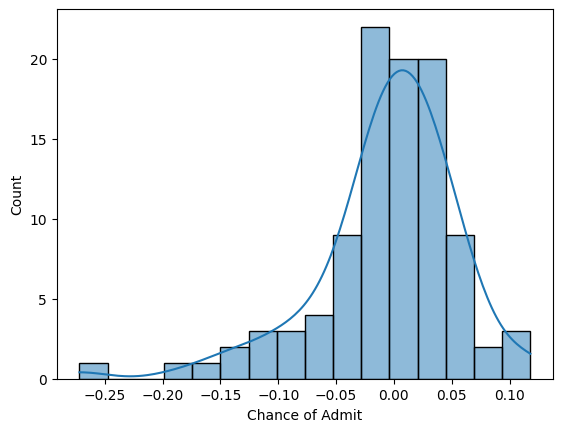

In [ ]:
sns.histplot(residuals,kde=True)

In [ ]:
from scipy import stats

res = stats.shapiro(residuals)
res.statistic

0.9178698658943176

* From the Shapiro test done above we can residuals is more towards normal
* Mean of residual is equal to  zero so we can say that the model is not biased

####**Linearity of Variables**

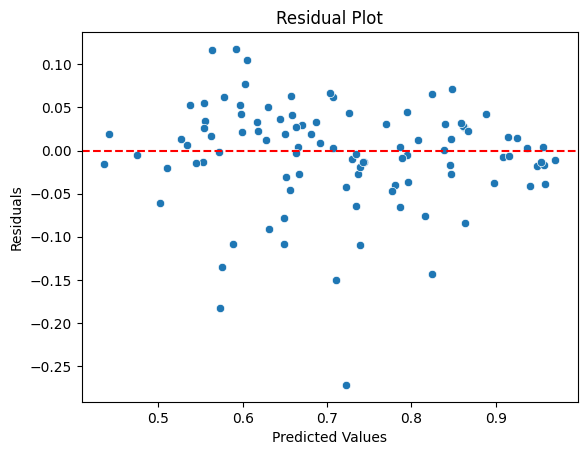

In [ ]:
sns.scatterplot(x = y_pred_test.reshape((-1,)), y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show();

####**Homoscedasticity**

Homoscedasticity refers to the assumption in regression analysis that the variance of the residuals (or errors) should be constant across all levels of the independent variables.

Text(0.5, 1.0, 'Predicted values vs Residuals')

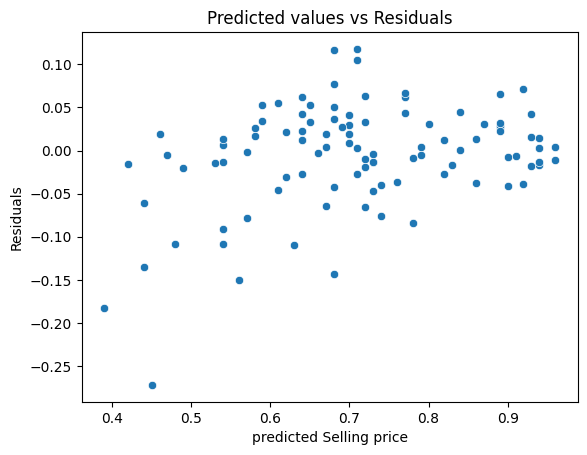

In [ ]:
sns.scatterplot(x=y_test,y=residuals)
plt.xlabel("predicted Selling price")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

Conduction Goldfeld-Quandt Test to check difference in variance

In [ ]:
from statsmodels.compat import lzip
import statsmodels.api as sm
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
cols2 = vif["Features"][1:].values
X2 = pd.DataFrame(x_train, columns=x_train.columns)[cols2]
X2_sm = sm.add_constant(X2)
test = sms.het_goldfeldquandt(y_train, X2_sm)
lzip(name, test)

[('F statistic', 1.0022169697233032), ('p-value', 0.4938714485007301)]

From the goldfeld-quandt test:
- F Statistic comes out to be 1.00 => Implying minimal difference in variance between groups
- p-value of 0.493 indicates that this difference is  statistically significant at conventional levels of significance (e.g., 0.05).

Therefore, we accept the null hypothesis of homoscedasticity, and conclude that there is no strong evidence of heteroscedasticity in the data.

####**Normality of residuals**

In the above histogram in mean of residuals section we could seee that the distribution is close to normal.

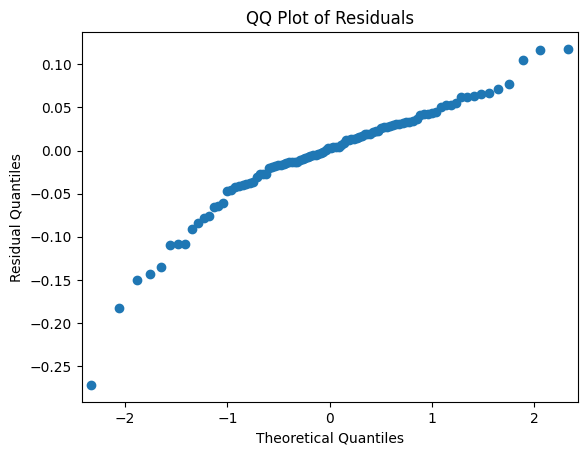

In [ ]:
# QQ-Plot of residuals
sm.qqplot(residuals)
plt.title('QQ Plot of Residuals')
plt.ylabel('Residual Quantiles')
plt.show()

The QQ plot shows that residuals are slightly deviating from the straight diagonal.

###Regularization of Linear Model

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
model_ridge = Ridge(alpha=1)
model_lasso = Lasso(alpha=0.01)
#Alpha is the regularization strength

In [ ]:
model_ridge.fit(x_train,y_train)
model_lasso.fit(x_train,y_train)

Lasso(alpha=0.01)

In [ ]:
Y_pred_ridge = model_ridge.predict(x_train)
Y_pred_lasso = model_lasso.predict(x_train)

In [ ]:
#@title Ridge Model Training scores
model_evaluation(y_train,Y_pred_ridge,model_ridge)

Model Evaluation for Ridge(alpha=1):
 MAE: 0.04
 RMSE: 0.06
 r2: 0.82
 adj_r2: 0.82


In [ ]:
#@title Ridge Model Test scores
y_pred_ridge = model_ridge.predict(x_test)
model_evaluation(y_test,y_pred_ridge,model_ridge)

Model Evaluation for Ridge(alpha=1):
 MAE: 0.04
 RMSE: 0.06
 r2: 0.82
 adj_r2: 0.81


In [ ]:
#@title Lasso Model Training scores
model_evaluation(y_train,Y_pred_lasso,model_lasso)

Model Evaluation for Lasso(alpha=0.01):
 MAE: 0.06
 RMSE: 0.08
 r2: 0.67
 adj_r2: 0.66


In [ ]:
#@title Lasso Model Test scores
y_pred_lasso = model_lasso.predict(x_test)
model_evaluation(y_test,y_pred_lasso,model_lasso)

Model Evaluation for Lasso(alpha=0.01):
 MAE: 0.06
 RMSE: 0.08
 r2: 0.69
 adj_r2: 0.67


* From the above evaluation scores we can say that the performance of Linear Regression and Ridge Regression is same where as the Lasso Regression has not performed well

##Comparison of Model Performance

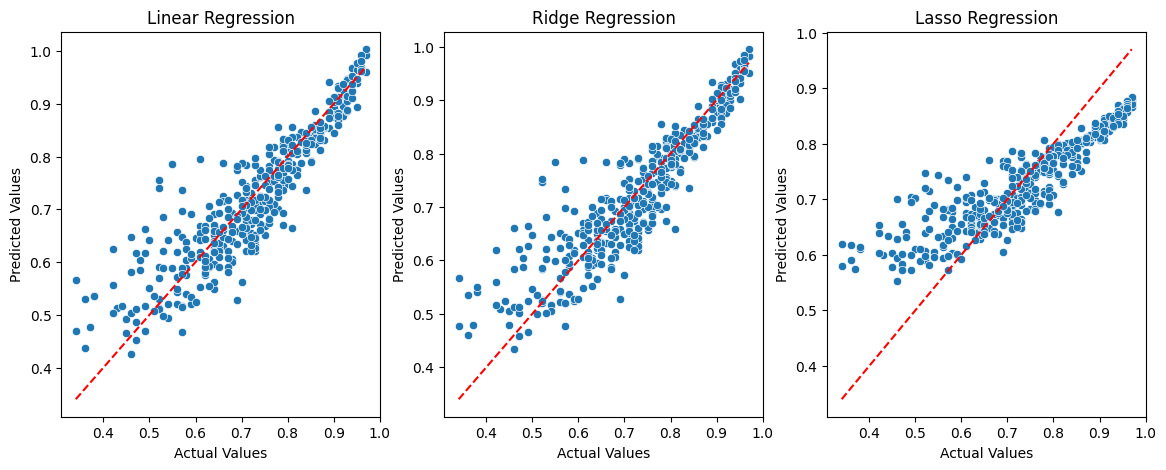

In [ ]:
actual_values = y_train.values
predicted_values = [y_pred_train, Y_pred_ridge, Y_pred_lasso]

model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']

plt.figure(figsize=(14, 5))
for i in range(len(predicted_values)):
    ax = plt.subplot(1, 3, i+1)
    sns.scatterplot(x=actual_values, y=predicted_values[i], ax=ax)
    plt.plot([min(actual_values),max(actual_values)], [min(actual_values),max(actual_values)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(model[i])
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')


* We can observe that both Linear Regression and Ridge Regression have similar accuracy while Lasso regression has oversimplified the model.

* This is the reason that the r2 score of Lasso regression is less. It doesn't capture any variance in the target variable. It has predicted the same value across all instances.

##Insights


1. Higher university ranking, research quality, and strong SOP and LOR increase admission chances.
2. Exam scores show a high positive correlation with admission chances.
3. Admission chances distribution is left-skewed.
4. CGPA is the most significant factor, while university rating and SOP are the least significant, based on Linera Regression model weights.
5. Linear Regression and Ridge Regression models explain up to 82% of the variance in admission chances.
6. High collinearity among predictor variables limits model improvement.
7. Predictor variables meet Linear Regression assumptions: mean residuals are close to 0.
8. Linearity of variables is confirmed.
9. Residuals follow a normal distribution.
10. Homoscedasticity of residuals is established.

## Recommendations


1. Including more independent features can enhance the model's performance.
2. Creating a composite score from correlated exam scores can capture their collective impact.
3. A weighted average score combining CGPA and university ranking will better reflect overall academic performance.
4. Including relevant work or project experience can significantly impact admission decisions.
5. Adding features for personal or academic projects, especially those related to the field of study, can improve the model.
6. Incorporating the timing of the application as a feature may influence institutional decision-making.
7. Including a feature indicating whether the applicant is seeking financial aid might affect admission probabilities.